## Load Libraries

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

%matplotlib inline

# Set ipython's max row display
pd.set_option('display.max_row', 1000)

# Set iPython's max column width to 50
pd.set_option('display.max_columns', 50)

sns.set(color_codes=True)

## Loading the data

In [2]:
month1_df = pd.read_csv("./data/aug_month_new.csv")
month2_df = pd.read_csv("./data/sept_month_new.csv")
month3_df = pd.read_csv("./data/oct_month_new.csv")
month4_df = pd.read_csv("./data/nov_month_new.csv")
month5_df = pd.read_csv("./data/dec_month_new.csv")
month6_df = pd.read_csv("./data/jan_month_new.csv")
month7_df = pd.read_csv("./data/feb_month_new.csv")
month8_df = pd.read_csv("./data/mar_month_new.csv")

raw_df = pd.concat([month1_df,month2_df,month3_df,month4_df,month5_df,month6_df,month7_df,month8_df])

## Data Pre-prossessing

In [3]:
raw_df.dtypes

schedule_no                    int64
route_id                       int64
trip_number                    int64
scheduled_trip_start_time     object
scheduled_trip_end_time       object
device_id                    float64
route_bus_stop_id              int64
route_order                    int64
window_start_time             object
window_end_time               object
is_dread_trip                  int64
distance                       int64
time_to_travel                 int64
bus_stop_name                 object
bus_stop_latitude            float64
bus_stop_longitude           float64
dayofweek                     object
month                          int64
year                           int64
ist_timestamp_seconds        float64
acc_distance                 float64
arrival_time                  object
dtype: object

In [4]:
raw_df.count()

schedule_no                  75650
route_id                     75650
trip_number                  75650
scheduled_trip_start_time    75650
scheduled_trip_end_time      75650
device_id                    74609
route_bus_stop_id            75650
route_order                  75650
window_start_time            75650
window_end_time              75585
is_dread_trip                75650
distance                     75650
time_to_travel               75650
bus_stop_name                75650
bus_stop_latitude            75650
bus_stop_longitude           75650
dayofweek                    75650
month                        75650
year                         75650
ist_timestamp_seconds        48701
acc_distance                 48701
arrival_time                 48701
dtype: int64

In [5]:
raw_df.head()

,schedule_no,route_id,trip_number,scheduled_trip_start_time,scheduled_trip_end_time,device_id,route_bus_stop_id,route_order,window_start_time,window_end_time,is_dread_trip,distance,time_to_travel,bus_stop_name,bus_stop_latitude,bus_stop_longitude,dayofweek,month,year,ist_timestamp_seconds,acc_distance,arrival_time
0,3037,9197,1,07:45:00,07:47:00,150812438.0,1291,1,2016-08-08 06:48:54,2016-08-08 07:12:06,1,0,0,Depot-34 (Kottanur),12.871938,77.586195,Monday,8,2016,NaN,NaN,NaN
1,3037,9197,1,07:45:00,07:47:00,150812438.0,1291,1,2016-08-09 06:45:56,2016-08-09 07:01:36,1,0,0,Depot-34 (Kottanur),12.871938,77.586195,Tuesday,8,2016,NaN,NaN,NaN
2,3037,9197,1,07:45:00,07:47:00,150812438.0,1291,1,2016-08-18 06:40:36,2016-08-18 06:40:36,1,0,0,Depot-34 (Kottanur),12.871938,77.586195,Thursday,8,2016,NaN,NaN,NaN
3,3037,9197,1,07:45:00,07:47:00,150812438.0,1291,1,2016-08-27 07:06:49,2016-08-27 07:23:59,1,0,0,Depot-34 (Kottanur),12.871938,77.586195,Saturday,8,2016,NaN,NaN,NaN
4,3037,9197,1,07:45:00,07:47:00,150812438.0,1291,1,2016-08-04 06:56:57,2016-08-04 06:58:35,1,0,0,Depot-34 (Kottanur),12.871938,77.586195,Thursday,8,2016,NaN,NaN,NaN


In [6]:
filtered_df = raw_df
filtered_df.is_copy = False

In [7]:
# Select required features: For a particular schedule: 365R
filtered_df = filtered_df[["route_id","trip_number", "device_id", "route_bus_stop_id", "route_order",
                           "is_dread_trip", "distance", "time_to_travel", "dayofweek", "month", "year",
                           "ist_timestamp_seconds", "arrival_time"]]

# Remove rows where ist_timestamp_seconds is NaN
#filtered_df = filtered_df.dropna(subset=['ist_timestamp_seconds'])

### Feature Engineering

In [8]:
derived_df = filtered_df
derived_df.is_copy = False
derived_df.head()

,route_id,trip_number,device_id,route_bus_stop_id,route_order,is_dread_trip,distance,time_to_travel,dayofweek,month,year,ist_timestamp_seconds,arrival_time
0,9197,1,150812438.0,1291,1,1,0,0,Monday,8,2016,NaN,NaN
1,9197,1,150812438.0,1291,1,1,0,0,Tuesday,8,2016,NaN,NaN
2,9197,1,150812438.0,1291,1,1,0,0,Thursday,8,2016,NaN,NaN
3,9197,1,150812438.0,1291,1,1,0,0,Saturday,8,2016,NaN,NaN
4,9197,1,150812438.0,1291,1,1,0,0,Thursday,8,2016,NaN,NaN


### Derived features: Converting route_id, dayofweek,month,year into categorical vars

In [9]:
derived_df.dtypes

route_id                   int64
trip_number                int64
device_id                float64
route_bus_stop_id          int64
route_order                int64
is_dread_trip              int64
distance                   int64
time_to_travel             int64
dayofweek                 object
month                      int64
year                       int64
ist_timestamp_seconds    float64
arrival_time              object
dtype: object

In [10]:
derived_df["route_id"] = derived_df["route_id"].astype("category")
derived_df["route_bus_stop_id"] = derived_df["route_bus_stop_id"].astype("category")
derived_df["dayofweek"] = derived_df["dayofweek"].astype("category")
derived_df["month"] = derived_df["month"].astype("category")
derived_df["year"] = derived_df["year"].astype("category")
derived_df["is_dread_trip"] = derived_df["is_dread_trip"].astype("category")

# GK: Doubt for trip_number and route_order

In [11]:
derived_df.dtypes

route_id                 category
trip_number                 int64
device_id                 float64
route_bus_stop_id        category
route_order                 int64
is_dread_trip            category
distance                    int64
time_to_travel              int64
dayofweek                category
month                    category
year                     category
ist_timestamp_seconds     float64
arrival_time               object
dtype: object

### Derived feature: derive time slot from timestamp

In [12]:
derived_df["arrival_time"] = pd.to_datetime(derived_df["arrival_time"])
derived_df["time_slot"] = derived_df["arrival_time"].dt.hour

### Derived feature: dayofweek in numeric

In [13]:
derived_df['dayofweek_numeric'] = derived_df['arrival_time'].dt.dayofweek

### Derived Feature: dayofmonth

In [14]:
derived_df["dayofmonth"] = derived_df["arrival_time"].dt.day
derived_df["dayofmonth"] = derived_df["dayofmonth"].astype("category")

### Derived feature: deriving time to travel between bus stops

In [15]:
derived_df.columns

Index(['route_id', 'trip_number', 'device_id', 'route_bus_stop_id',
       'route_order', 'is_dread_trip', 'distance', 'time_to_travel',
       'dayofweek', 'month', 'year', 'ist_timestamp_seconds', 'arrival_time',
       'time_slot', 'dayofweek_numeric', 'dayofmonth'],
      dtype='object')

In [16]:
grouped_derived_df = derived_df.groupby(['device_id','route_id','trip_number','dayofmonth','month','year'])

In [17]:
arrival_time_derived_df = pd.DataFrame()
for name,group in grouped_derived_df:
    group['actual_time_to_travel'] = group['ist_timestamp_seconds'].diff()
    arrival_time_derived_df = arrival_time_derived_df.append(group)

/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [18]:
arrival_time_derived_df.to_csv("arrival_time_derived.csv", index = False)

In [19]:
len(arrival_time_derived_df.index)

48701

In [20]:
arrival_time_derived_df.head()

,route_id,trip_number,device_id,route_bus_stop_id,route_order,is_dread_trip,distance,time_to_travel,dayofweek,month,year,ist_timestamp_seconds,arrival_time,time_slot,dayofweek_numeric,dayofmonth,actual_time_to_travel
1264,20239,4,150812438.0,160,1,0,0,0,Sunday,1,2017,1.483249e+09,2017-01-01 11:03:22,11.0,6.0,1.0,NaN
1283,20239,4,150812438.0,5841,2,0,80,6,Sunday,1,2017,1.483249e+09,2017-01-01 11:03:32,11.0,6.0,1.0,10.0
1312,20239,4,150812438.0,33,3,0,210,15,Sunday,1,2017,1.483249e+09,2017-01-01 11:04:23,11.0,6.0,1.0,51.0
1334,20239,4,150812438.0,5840,4,0,60,4,Sunday,1,2017,1.483249e+09,2017-01-01 11:04:43,11.0,6.0,1.0,20.0
1379,20239,4,150812438.0,8455,5,0,70,5,Sunday,1,2017,1.483249e+09,2017-01-01 11:04:53,11.0,6.0,1.0,10.0


#### Removing outliers based on actual time to travel between bus stops

In [21]:
new_derived_df = pd.read_csv('arrival_time_derived.csv')

In [22]:
len(new_derived_df.index)

48701

In [23]:
new_derived_df[(new_derived_df["dayofmonth"] == 12)  & (new_derived_df["trip_number"] == 4) ]

,route_id,trip_number,device_id,route_bus_stop_id,route_order,is_dread_trip,distance,time_to_travel,dayofweek,month,year,ist_timestamp_seconds,arrival_time,time_slot,dayofweek_numeric,dayofmonth,actual_time_to_travel
2327,20239,4,150812438.0,160,1,0,0,0,Sunday,2,2017,1.486872e+09,2017-02-12 09:22:42,9.0,6.0,12.0,NaN
2328,20239,4,150812438.0,5841,2,0,80,6,Sunday,2,2017,1.486872e+09,2017-02-12 09:23:12,9.0,6.0,12.0,30.0
2329,20239,4,150812438.0,33,3,0,210,15,Sunday,2,2017,1.486872e+09,2017-02-12 09:26:21,9.0,6.0,12.0,189.0
2330,20239,4,150812438.0,5840,4,0,60,4,Sunday,2,2017,1.486872e+09,2017-02-12 09:26:30,9.0,6.0,12.0,9.0
2331,20239,4,150812438.0,8455,5,0,70,5,Sunday,2,2017,1.486872e+09,2017-02-12 09:26:40,9.0,6.0,12.0,10.0
2332,20239,4,150812438.0,61,7,0,357,85,Sunday,2,2017,1.486872e+09,2017-02-12 09:31:30,9.0,6.0,12.0,290.0
2333,20239,4,150812438.0,126,8,0,577,110,Sunday,2,2017,1.486872e+09,2017-02-12 09:32:29,9.0,6.0,12.0,59.0
2334,20239,4,150812438.0,159,10,0,418,104,Sunday,2,2017,1.486872e+09,2017-02-12 09:36:08,9.0,6.0,12.0,219.0
2335,20239,4,150812438.0,353,11,0,961,180,Sunday,2,2017,1.486873e+09,2017-02-12 09:39:48,9.0,6.0,12.0,220.0
2336,20239,4,150812438.0,8579,12,0,239,43,Sunday,2,2017,1.486873e+09,2017-02-12 09:40:17,9.0,6.0,12.0,29.0


In [24]:
# Remove rows with negaive timestamp
new_derived_df = new_derived_df[new_derived_df["actual_time_to_travel"]>1]

In [25]:
len(new_derived_df.index)

43281

In [26]:
#new_derived_df = new_derived_df.sort_values(['device_id','trip_number','route_order'])
#new_derived_df = new_derived_df.reset_index(drop=True)

In [27]:
new_derived_df.actual_time_to_travel.describe()

count    43281.000000
mean       285.694647
std       1007.568169
min          9.000000
25%         70.000000
50%        119.000000
75%        199.000000
max      26530.000000
Name: actual_time_to_travel, dtype: float64

In [28]:
pd.options.display.float_format = '{:.2f}'.format

In [29]:
new_derived_df.actual_time_to_travel.describe(percentiles=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.92,0.94,0.96,0.97,0.98,0.99])

count   43281.00
mean      285.69
std      1007.57
min         9.00
10%        30.00
20%        60.00
30%        80.00
40%        99.00
50%       119.00
60%       139.00
70%       170.00
80%       229.00
90%       329.00
92%       377.00
94%       439.00
96%       597.00
97%       897.00
98%      3068.00
99%      5401.60
max     26530.00
Name: actual_time_to_travel, dtype: float64

In [30]:
# Remove rows with travel time between bus stops is greater than 97 percentile
new_derived_df = new_derived_df[new_derived_df['actual_time_to_travel'] <= 897]

In [31]:
len(new_derived_df.index)

41984

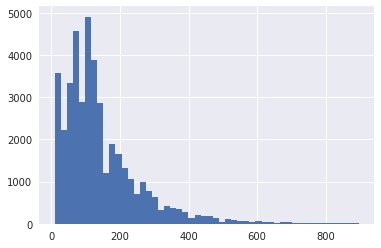

In [33]:
# Histogram of actual time to travel to the bus stop
new_derived_df.actual_time_to_travel.hist(bins=50)

### Derived Feature: day of week dummy variables

In [ ]:
#dayofweek_encode = pd.get_dummies(new_derived_df['dayofweek'])
#new_derived_df = new_derived_df.join(dayofweek_encode)
#dayofweek_encode

### Derived Features: bus stop dummy variables

In [ ]:
# Transform entries having route order greater than 80
#new_derived_df['route_order_cat'] = np.where(new_derived_df['route_order'] >= 50,50,new_derived_df["route_order"])

# Encoding into the categrocial variable
#bus_stop_order_encode = pd.get_dummies(new_derived_df["route_order_cat"], prefix = "BS")
#new_derived_df = new_derived_df.join(bus_stop_order_encode)

### Encoding using scikit learn

In [34]:
encoded_df = new_derived_df
encoded_df.is_copy = False
encoded_df.head()

,route_id,trip_number,device_id,route_bus_stop_id,route_order,is_dread_trip,distance,time_to_travel,dayofweek,month,year,ist_timestamp_seconds,arrival_time,time_slot,dayofweek_numeric,dayofmonth,actual_time_to_travel
1,20239,4,150812438.00,5841,2,0,80,6,Sunday,1,2017,1483248812.00,2017-01-01 11:03:32,11.00,6.00,1.00,10.00
2,20239,4,150812438.00,33,3,0,210,15,Sunday,1,2017,1483248863.00,2017-01-01 11:04:23,11.00,6.00,1.00,51.00
3,20239,4,150812438.00,5840,4,0,60,4,Sunday,1,2017,1483248883.00,2017-01-01 11:04:43,11.00,6.00,1.00,20.00
4,20239,4,150812438.00,8455,5,0,70,5,Sunday,1,2017,1483248893.00,2017-01-01 11:04:53,11.00,6.00,1.00,10.00
5,20239,4,150812438.00,124,6,0,1634,207,Sunday,1,2017,1483249081.00,2017-01-01 11:08:01,11.00,6.00,1.00,188.00


In [35]:
encoded_df.dtypes

route_id                   int64
trip_number                int64
device_id                float64
route_bus_stop_id          int64
route_order                int64
is_dread_trip              int64
distance                   int64
time_to_travel             int64
dayofweek                 object
month                      int64
year                       int64
ist_timestamp_seconds    float64
arrival_time              object
time_slot                float64
dayofweek_numeric        float64
dayofmonth               float64
actual_time_to_travel    float64
dtype: object

In [36]:
# Remove unncessary or duplicate information
encoded_df = encoded_df.drop('device_id', axis = 1)
encoded_df = encoded_df.drop('dayofweek', axis = 1)
encoded_df = encoded_df.drop('ist_timestamp_seconds', axis = 1)
encoded_df = encoded_df.drop('arrival_time', axis = 1)

In [37]:
# Convert categoical variables into category data type
encoded_df["route_id"] = encoded_df["route_id"].astype("category")
encoded_df["trip_number"] = encoded_df["trip_number"].astype("category")
encoded_df["route_bus_stop_id"] = encoded_df["route_bus_stop_id"].astype("category")
encoded_df["route_order"] = encoded_df["route_order"].astype("category")
encoded_df["is_dread_trip"] = encoded_df["is_dread_trip"].astype("category")
encoded_df["month"] = encoded_df["month"].astype("category")
encoded_df["year"] = encoded_df["year"].astype("category")
encoded_df["time_slot"] = encoded_df["time_slot"].astype("category")
encoded_df["dayofweek_numeric"] = encoded_df["dayofweek_numeric"].astype("category")
encoded_df["dayofmonth"] = encoded_df["dayofmonth"].astype("category")

In [38]:
subset_encoded_df = encoded_df.select_dtypes(include=['category'])

In [39]:
subset_encoded_df.head()

,route_id,trip_number,route_bus_stop_id,route_order,is_dread_trip,month,year,time_slot,dayofweek_numeric,dayofmonth
1,20239,4,5841,2,0,1,2017,11.00,6.00,1.00
2,20239,4,33,3,0,1,2017,11.00,6.00,1.00
3,20239,4,5840,4,0,1,2017,11.00,6.00,1.00
4,20239,4,8455,5,0,1,2017,11.00,6.00,1.00
5,20239,4,124,6,0,1,2017,11.00,6.00,1.00


In [40]:
subset_encoded_df.shape

(41984, 10)

In [41]:
# Import preprocessing from sklearn
from sklearn import preprocessing

# Create a LabelEncoder object and fit it to each feature in X: Though not necessary as there are no object vars
# 1. INSTANTIATE
# encode labels with value between 0 and n_classes-1.
le = preprocessing.LabelEncoder()


# 2/3. FIT AND TRANSFORM
# use df.apply() to apply le.fit_transform to all columns
subset_encoded_df_2 = subset_encoded_df.apply(le.fit_transform)
subset_encoded_df_2.head()

,route_id,trip_number,route_bus_stop_id,route_order,is_dread_trip,month,year,time_slot,dayofweek_numeric,dayofmonth
1,0,2,54,0,0,0,1,4,6,0
2,0,2,0,1,0,0,1,4,6,0
3,0,2,53,2,0,0,1,4,6,0
4,0,2,64,3,0,0,1,4,6,0
5,0,2,42,4,0,0,1,4,6,0


In [81]:
np.unique(subset_encoded_df_2[["dayofmonth"]].values)
#"route_id","trip_number","route_bus_stop_id","route_order","is_dread_trip","month","year","time_slot","dayofweek_numeric","dayofmonth"

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])

In [82]:
4+11+76+40+1+8+2+15+7+31

195

In [42]:
# create a OneHotEncoder object, and fit it to all of X

# 1. INSTANTIATE
enc = preprocessing.OneHotEncoder()

# 2. FIT
enc.fit(subset_encoded_df_2)

# 3. Transform
onehotlabels = enc.transform(subset_encoded_df_2).toarray()
onehotlabels.shape

(41984, 195)

In [43]:
onehotlabels # For each training example, the categorical variables are encoded via a 195 Dimensional vector

array([[ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 1.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [83]:
onehotlabels[0]

array([ 1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,
        0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0

In [44]:
onehotlabels_df = pd.DataFrame(onehotlabels)

In [45]:
onehotlabels_df.shape

(41984, 195)

In [46]:
onehotlabels_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,...,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194
0,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [47]:
onehotlabels_df['actual_time_to_travel'] = encoded_df['actual_time_to_travel']

In [48]:
onehotlabels_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,...,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,actual_time_to_travel
0,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,nan
1,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,10.00
2,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,51.00
3,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,20.00
4,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,10.00


### Saving the Final data frame

In [50]:
onehotlabels_df.to_csv("PreProcessed.csv", index = False)